In [1]:
from datetime import datetime

import pandas
import matplotlib.pyplot as plt

from foo import *

import seaborn as sns

In [2]:
vinzenz_score_log = load_score_log('PolyGenStats-vinzenz-scorelog.csv')
extend_score_log(vinzenz_score_log)
vinzenz_summary = generate_station_stats(vinzenz_score_log)

fiebertrauma_score_log = load_score_log('PolyGenStats-Fiebertrauma-scorelog.csv')
extend_score_log(fiebertrauma_score_log)
fiebertrauma_summary = generate_station_stats(fiebertrauma_score_log)

vinzenz_score_log

when  score    sourcename                  name  mapx  \
0   2025-08-08 20:14:00    100   First Visit             Info Desk   216   
1   2025-08-08 20:19:00    282       Capture             Info Desk   216   
2   2025-08-08 20:20:00     58       Capture             Info Desk   216   
3   2025-08-08 20:22:00    100   First Visit              Main Bar   190   
4   2025-08-08 20:23:00    100   First Visit            Badge Tent   328   
..                  ...    ...           ...                   ...   ...   
896 2025-08-12 13:34:00     91       Capture                    0E     0   
897 2025-08-12 13:39:00     50         Visit              Pixelbar   379   
898 2025-08-12 13:42:00    164  Output Boost             Site Sign   207   
899 2025-08-12 13:50:00    694       Capture              Pixelbar   379   
900 2025-08-12 14:00:00    284  Output Boost  Maker Days Eindhoven   115   

     mapy  accumulated_score  seconds          when_start  
0     505              100.0        1 2025-08-08 20:13:59  
1     505              382.0      282 2025-08-08 20:14:18  
2     505              440.0       58 2025-08-08 20:19:02  
3     570              540.0        1 2025-08-08 20:21:59  
4     607              640.0        1 2025-08-08 20:22:59  
..    ...                ...      ...                 ...  
896     0           588456.0       91 2025-08-12 13:32:29  
897   602           588506.0        1 2025-08-12 13:38:59  
898   874           588670.0     1640 2025-08-12 13:14:40  
899   602           589364.0      694 2025-08-12 13:38:26  
900   749           589648.0     2840 2025-08-12 13:12:40  

[901 rows x 9 columns]

In [3]:
vinzenz_seconds = generate_score_per_second(vinzenz_score_log)
fiebertrauma_seconds = generate_score_per_second(fiebertrauma_score_log)

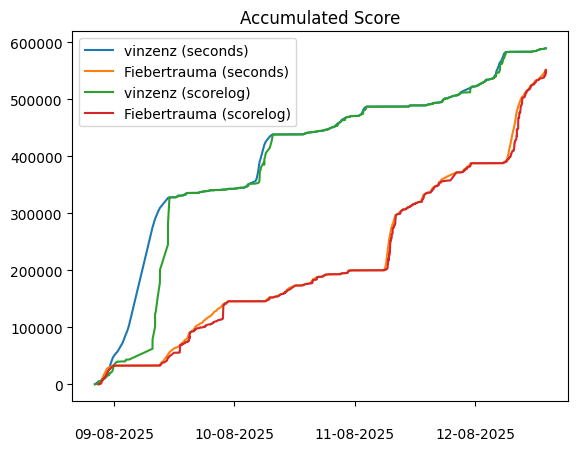

In [4]:
from matplotlib import dates

fig, ax = plt.subplots()
ax.plot('when', 'accumulated_score', data=vinzenz_seconds, label='vinzenz (seconds)')
ax.plot('when', 'accumulated_score', data=fiebertrauma_seconds, label='Fiebertrauma (seconds)')
ax.plot('when', 'accumulated_score', data=vinzenz_score_log, label='vinzenz (scorelog)')
ax.plot('when', 'accumulated_score', data=fiebertrauma_score_log, label='Fiebertrauma (scorelog)')

ax.xaxis.set_major_locator(dates.DayLocator(interval=1))    # every day
ax.xaxis.set_major_formatter(dates.DateFormatter('\n%d-%m-%Y'))
plt.title('Accumulated Score')
plt.legend()
plt.show()

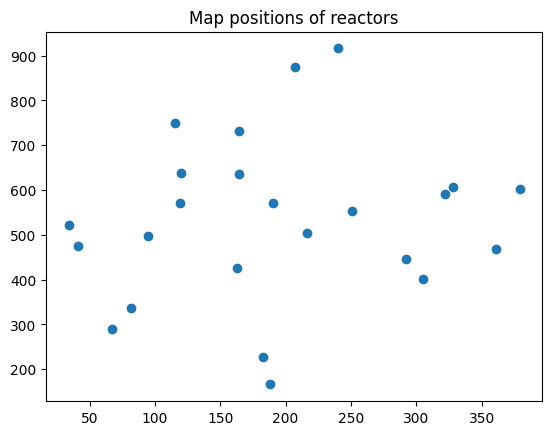

In [5]:
# TODO: add correctly cropped map as background
plt.scatter('mapx', 'mapy', data=vinzenz_summary[vinzenz_summary['mapx'] != 0])
plt.title('Map positions of reactors')
plt.show()

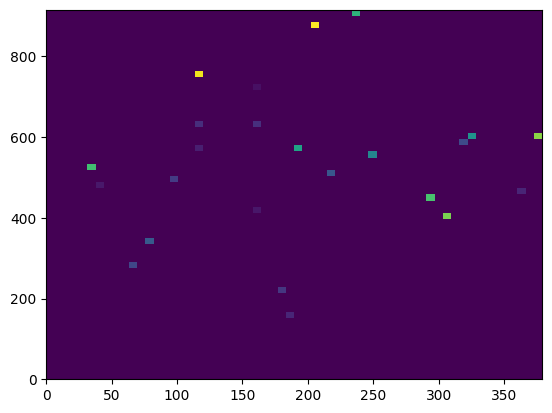

In [6]:
plt.hist2d('mapx', 'mapy', weights='score', data=vinzenz_score_log, bins=60)
plt.show()

In [7]:
vinzenz_locations = get_known_player_locations(vinzenz_score_log)
vinzenz_locations

name                when  mapx  mapy
0               Info Desk 2025-08-08 20:13:59   216   505
1               Info Desk 2025-08-08 20:14:18   216   505
2               Info Desk 2025-08-08 20:19:02   216   505
3               Info Desk 2025-08-08 20:20:57   216   505
4                Main Bar 2025-08-08 20:21:59   190   570
..                    ...                 ...   ...   ...
894  Maker Days Eindhoven 2025-08-12 13:12:40   115   749
895             Site Sign 2025-08-12 13:14:40   207   874
896             Site Sign 2025-08-12 13:14:59   207   874
897              Pixelbar 2025-08-12 13:38:26   379   602
898              Pixelbar 2025-08-12 13:38:59   379   602

[899 rows x 4 columns]

In [8]:
# TODO add sleep times to location data

In [9]:
vinzenz_locations_interpolated = interpolate_player_locations(vinzenz_locations)
vinzenz_locations_interpolated

when   mapx   mapy
0      2025-08-08 20:13:59  216.0  505.0
1      2025-08-08 20:14:00  216.0  505.0
2      2025-08-08 20:14:01  216.0  505.0
3      2025-08-08 20:14:02  216.0  505.0
4      2025-08-08 20:14:03  216.0  505.0
...                    ...    ...    ...
169297 2025-08-12 13:38:54  379.0  602.0
169298 2025-08-12 13:38:55  379.0  602.0
169299 2025-08-12 13:38:56  379.0  602.0
169300 2025-08-12 13:38:57  379.0  602.0
169301 2025-08-12 13:38:58  379.0  602.0

[169302 rows x 3 columns]

In [10]:
fiebertrauma_locations = get_known_player_locations(fiebertrauma_score_log)
fiebertrauma_locations_interpolated = interpolate_player_locations(fiebertrauma_locations)
fiebertrauma_locations_interpolated

when   mapx   mapy
0      2025-08-08 20:57:59  216.0  505.0
1      2025-08-08 20:58:00  216.0  505.0
2      2025-08-08 20:58:01  216.0  505.0
3      2025-08-08 20:58:02  216.0  505.0
4      2025-08-08 20:58:03  216.0  505.0
...                    ...    ...    ...
169590 2025-08-12 13:53:32  190.0  570.0
169591 2025-08-12 13:53:33  190.0  570.0
169592 2025-08-12 13:53:34  190.0  570.0
169593 2025-08-12 13:53:35  190.0  570.0
169594 2025-08-12 13:53:36  190.0  570.0

[169595 rows x 3 columns]

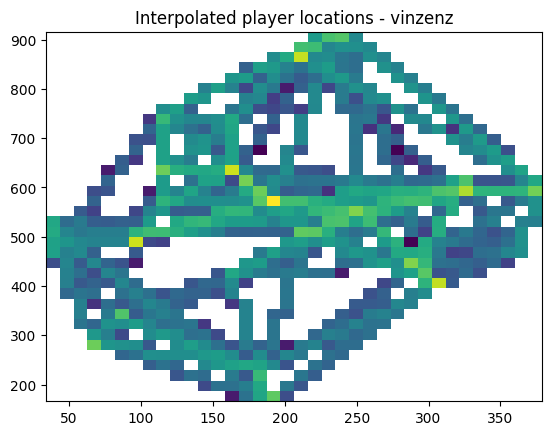

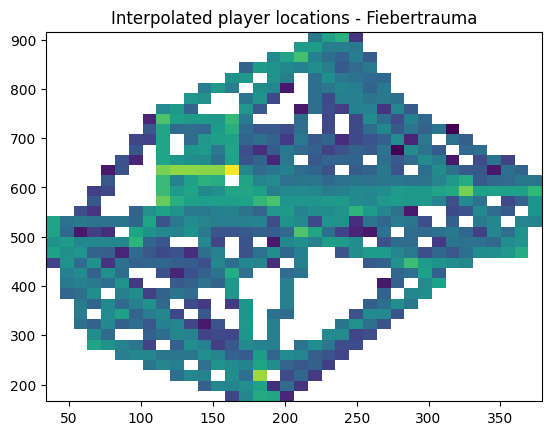

In [44]:
from matplotlib.colors import LogNorm

plt.hist2d('mapx', 'mapy', data=vinzenz_locations_interpolated, bins=36, norm=LogNorm())
plt.title('Interpolated player locations - vinzenz')
plt.show()

plt.hist2d('mapx', 'mapy', data=fiebertrauma_locations_interpolated, bins=36, norm=LogNorm())
plt.title('Interpolated player locations - Fiebertrauma')
plt.show()


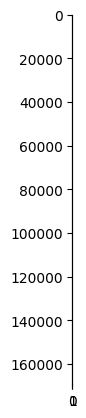

In [37]:
plt.imshow(vinzenz_locations_interpolated[['mapx', 'mapy']], norm=LogNorm())

<Axes: xlabel='mapx', ylabel='mapy'>

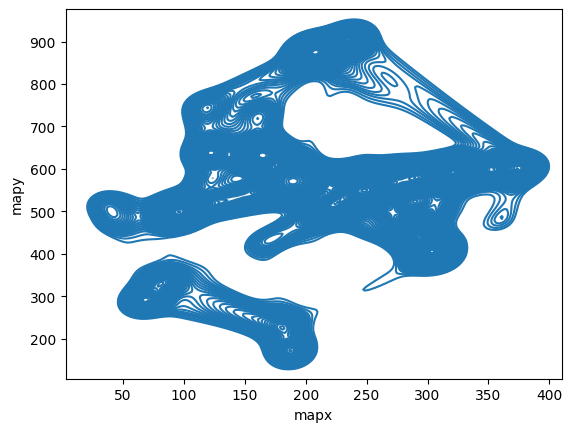

In [54]:
sns.kdeplot(
    data=vinzenz_locations_interpolated, x="mapx", y="mapy",
    fill=False, levels=100#, thresh=0,
)

<Axes: xlabel='mapx', ylabel='mapy'>

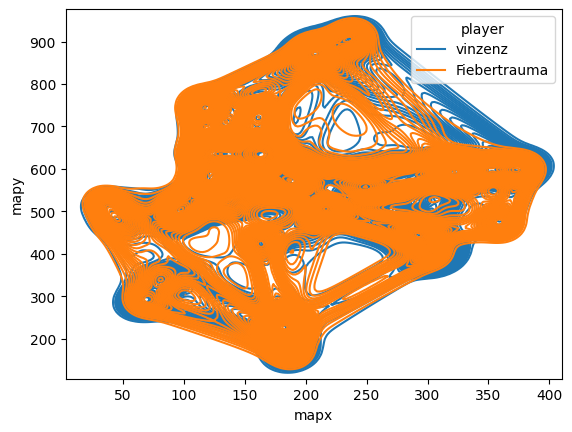

In [52]:
loc_vin = vinzenz_locations_interpolated.copy()
loc_vin['player'] = 'vinzenz'

loc_fib = fiebertrauma_locations_interpolated.copy()
loc_fib['player'] = 'Fiebertrauma'

loc = pandas.concat([loc_vin, loc_fib])
sns.kdeplot(
    data=loc, x="mapx", y="mapy", hue='player',
    fill=False, levels=100, thresh=0,
)